<a href="https://colab.research.google.com/github/LEESUAJE1978/deeplearning_sejong/blob/master/ex06_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0. 텐서플로우 버전 선택

In [ ]:
#0. 텐서플로우 버전 선택
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 1.x
except Exception:
    pass

1. 패키지 import

In [ ]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


2. image 데이터 생성(9개의 이미지)

(1, 3, 3, 1)


/tensorflow-1.15.2/python3.6/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


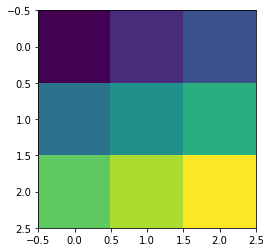

In [100]:
sess = tf.InteractiveSession()
image = np.array([[[[1],[2],[3]],
                  [[4],[5],[6]],
                  [[7],[8],[9]]]], dtype = np.float32)
print(image.shape)
plt.imshow(image.reshape(3,3), cmap= 'viridis')
plt.show()

3. 필터생성

3.1. 2 by 1 필터

(1, 3, 3, 1)
weight.shape (2, 1, 1, 1)
conv2d_img.shape (1, 2, 3, 1)


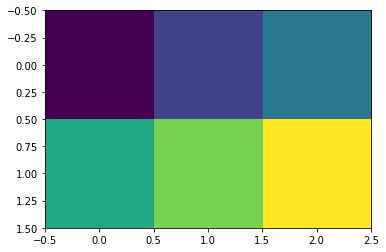

In [84]:
print(image.shape)
weight = tf.constant([[[[1]]],
                      [[[1]]]], dtype = np.float32)
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1,1], padding='VALID') 
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
plt.imshow(conv2d_img.reshape(2,3), cmap= 'viridis')

3.2. 2 by 2 필터

(1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d_img.shape (1, 2, 2, 1)


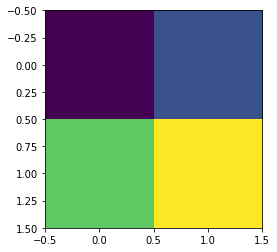

In [85]:
print(image.shape)
weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])  # dtype 설정 주의
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1,1], padding='VALID')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
plt.imshow(conv2d_img.reshape(2,2), cmap= 'viridis')

4. 패딩(Padding)적용

4.1. 2 by 1 필터에 패딩 적용

(1, 3, 3, 1)
weight.shape (2, 1, 1, 1)
conv2d_img.shape (1, 3, 3, 1)


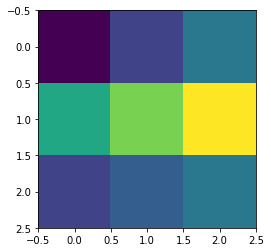

In [88]:
print(image.shape)
weight = tf.constant([[[[1]]],
                      [[[1]]]], dtype = np.float32) #(구조, 구조, 색, 필터수)
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1,1], padding='SAME') 
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
plt.imshow(conv2d_img.reshape(3,3), cmap= 'viridis')

4.2. 2 by 2 필터에 패딩 적용

(1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d_img.shape (1, 3, 3, 1)


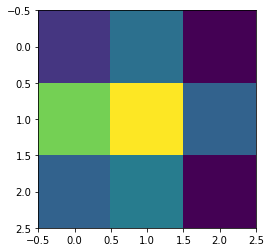

In [89]:
print(image.shape)
weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]]) #(구조, 구조, 색, 필터수)
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1,1], padding='SAME')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
plt.imshow(conv2d_img.reshape(3,3), cmap= 'viridis')

4.3. 2 by 2 구조에 3 필터 적용

weight.shape (2, 2, 1, 3)
conv2d_img.shape (1, 3, 3, 3)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


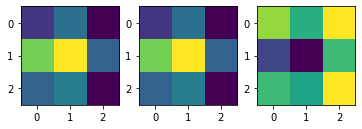

In [102]:
weight = tf.constant([[[[1.,10.,-1.]],[[1.,10.,-1.]]],
                      [[[1.,10.,-1.]],[[1.,10.,-1.]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,3,i+1), plt.imshow(one_img.reshape(3,3), cmap='viridis')

PoP Quiz: 이미지 데이터가 (1,4,4,1)이고 필터가(2,2,1,1)일 때 conv2d_img 의 shape은 어떻게 되는지? 그리고 그래프를 그리기 위한 reshape은 어떻게 해야 하는지?

(1, 4, 4, 1)


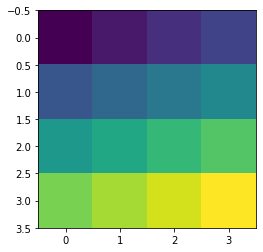

In [90]:
image = np.array([[[[1],[2],[3],[4]],
                  [[5],[6],[7],[8]],
                  [[9],[10],[11],[12]],
                  [[13],[14],[15],[16]]]], dtype = np.float32)
print(image.shape)
plt.imshow(image.reshape(4,4), cmap= 'viridis')
plt.show()

(1, 4, 4, 1)
weight.shape (2, 2, 1, 1)
conv2d_img.shape (1, 3, 3, 1)


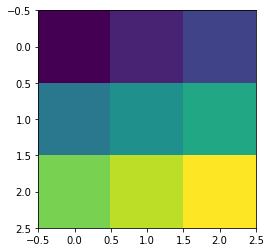

In [95]:
print(image.shape)
weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])  # dtype 설정 주의 , #(구조, 구조, 색, 필터수)
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1,1], padding='VALID')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
plt.imshow(conv2d_img.reshape(3,3), cmap= 'viridis')

5. max pooling방식

5.1. padding = 'valid'

In [109]:
image = np.array([[[[4],[3]],[[2],[1]]]], dtype=np.float32)
pool = tf.nn.max_pool(image, ksize=[1, 2, 2, 1], strides=[1, 1, 1, 1], padding='VALID')
print(image.shape)
print(pool.shape)
print(pool.eval())

(1, 2, 2, 1)
(1, 1, 1, 1)
[[[[4.]]]]


5.2. padding = 'SAME'

In [110]:
image = np.array([[[[4],[3]],[[2],[1]]]], dtype=np.float32)
pool = tf.nn.max_pool(image, ksize=[1, 2, 2, 1], strides=[1, 1, 1, 1], padding='SAME')
print(image.shape)
print(pool.shape)
print(pool.eval())


(1, 2, 2, 1)
(1, 2, 2, 1)
[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]
